In [1]:
import numpy as np
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
# Copied this snippet from readme
# u.data     -- The full u data set, 100000 ratings by 943 users on 1682 items.
#               Each user has rated at least 20 movies.  Users and items are
#               numbered consecutively from 1.  The data is randomly
#               ordered. This is a tab separated list of 
# 	         user id | item id | rating | timestamp. 
#               The time stamps are unix seconds since 1/1/1970 UTC 
# timestamp field ignored - it just holds the time yymmdd when the rating given by user
df = pd.read_csv('u.data', sep = '\t', names = ['user_id', 'item_id', 'rating', 'timestamp'])

In [70]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [71]:
df.shape

(100000, 4)

In [72]:
df['user_id'].nunique()

943

In [73]:
df['item_id'].nunique()

1682

In [63]:
df_item = pd.read_csv('u.item', sep = '\|', header = None, encoding = "ISO-8859-1")
df_item.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [64]:
df_item.shape

(1682, 24)

In [65]:
df_item.iloc[:, :2]

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [66]:
df_item[[0,1]]

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [74]:
df_item = df_item.iloc[:, :2]
df_item.columns = ['item_id', 'title' ]
df_item.columns

Index(['item_id', 'title'], dtype='object')

In [75]:
df_item

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [76]:
df

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [77]:
df = pd.merge(df, df_item, on = 'item_id')
df

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [49]:
### Exploratory Data Analysis

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [84]:
titles = df.groupby('title')['rating'].mean()
titles

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [87]:
df.groupby('title').mean()['rating']

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [99]:
df.groupby('title').mean()['rating'].sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [100]:
# movies with rating 5 is outlier - coz just one person would have watched this movie/given this rating 
# and isn't the true average for all users watched this movie 

In [104]:
df.groupby('title').count()['rating'].sort_values()

title
Á köldum klaka (Cold Fever) (1994)              1
Mille bolle blu (1993)                          1
Mat' i syn (1997)                               1
Marlene Dietrich: Shadow and Light (1996)       1
Man from Down Under, The (1943)                 1
                                             ... 
Liar Liar (1997)                              485
Return of the Jedi (1983)                     507
Fargo (1996)                                  508
Contact (1997)                                509
Star Wars (1977)                              583
Name: rating, Length: 1664, dtype: int64

In [112]:
ratings_df = pd.DataFrame(df.groupby('title').mean()['rating'])
rating_count_df = pd.DataFrame(df.groupby('title').count()['rating'])


(array([ 76.,  30., 103., 178., 233., 417., 333., 240.,  43.,  11.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

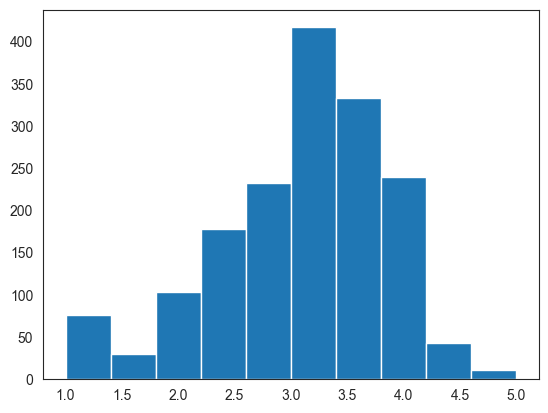

In [113]:
plt.hist(ratings_df)

(array([1.125e+03, 2.530e+02, 1.360e+02, 6.900e+01, 3.700e+01, 2.400e+01,
        8.000e+00, 5.000e+00, 6.000e+00, 1.000e+00]),
 array([  1. ,  59.2, 117.4, 175.6, 233.8, 292. , 350.2, 408.4, 466.6,
        524.8, 583. ]),
 <BarContainer object of 10 artists>)

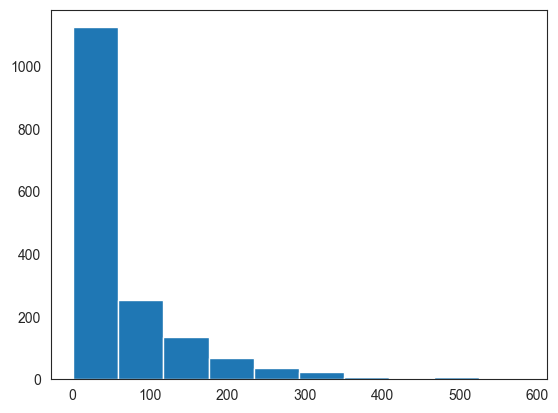

In [114]:
plt.hist(rating_count_df)

In [121]:
ratings_df['rating_count'] = pd.DataFrame(rating_count_df)

In [124]:
ratings_df

,rating,rating_count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [129]:
ratings_df.sort_values(by = 'rating', ascending = False)

,rating,rating_count
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


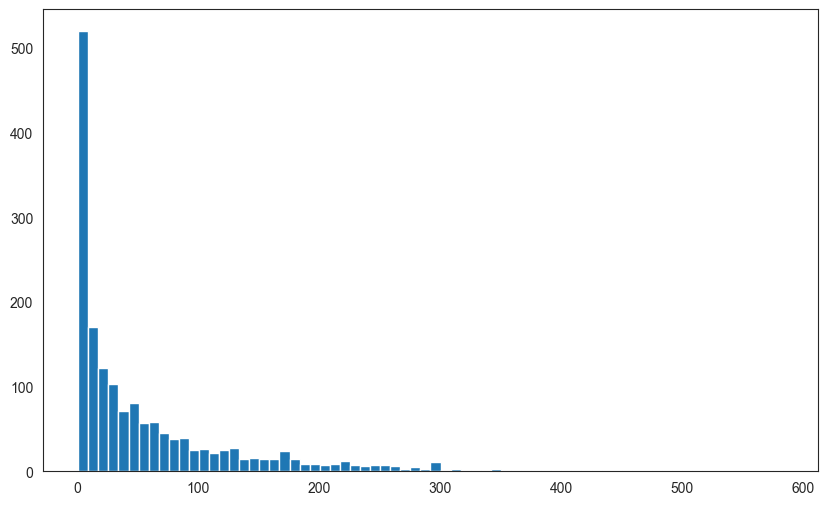

In [136]:
plt.figure(figsize=(10,6))
plt.hist(ratings_df['rating_count'], bins = 70)
plt.show()

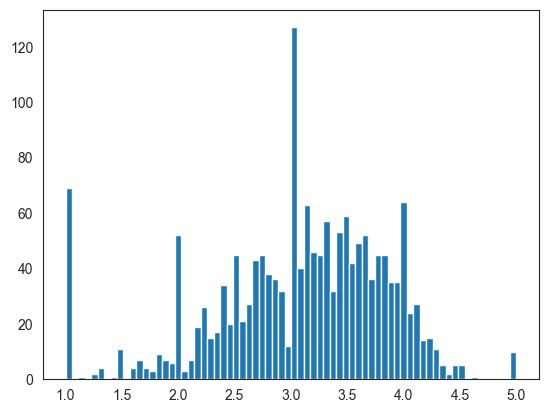

In [139]:
plt.hist(ratings_df['rating'], bins = 70)
plt.show()

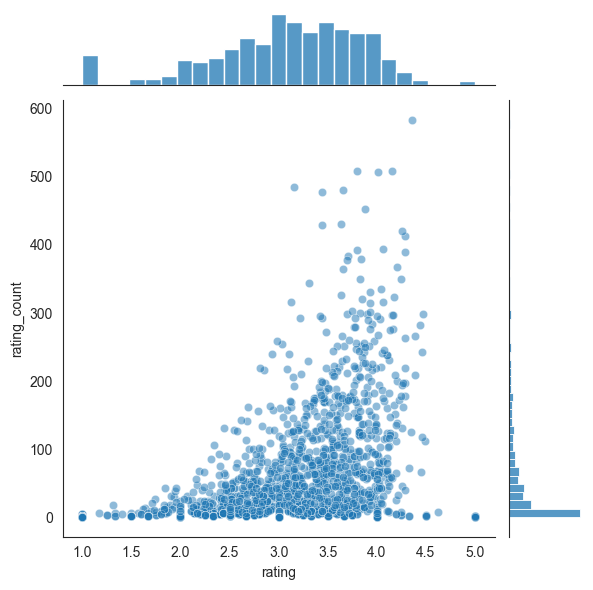

In [148]:
sns.jointplot(x= 'rating',y= 'rating_count', data=ratings_df, alpha = 0.5)

In [149]:
# Creating Movie Recommendation System

In [150]:
movie_matrix = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')

In [151]:
movie_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
ratings_df.sort_values(by = 'rating_count', ascending= False)

,rating,rating_count
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [155]:
starwar_rating_vector = movie_matrix['Star Wars (1977)']
starwar_rating_vector

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [184]:
similar_to_starwars = movie_matrix.corrwith(starwar_rating_vector)
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [186]:
movie_matrix['Á köldum klaka (Cold Fever) (1994)']
# this movie has NO covar/ NO corr with starwars - coz NO VARIATION IN RATING observed for this movie

user_id
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
       ..
939   NaN
940   NaN
941   NaN
942   NaN
943   NaN
Name: Á köldum klaka (Cold Fever) (1994), Length: 943, dtype: float64

In [180]:
matrix_ex = pd.DataFrame({'ID' : [1, 2],
                         'A' : [1, 2],
                         'B' : [3, 4],
                         'C' : [-1, -2],
                         'D' : [3, 3]})
matrix_ex

,ID,A,B,C,D
0,1,1,3,-1,3
1,2,2,4,-2,3


In [181]:
vector_ex = pd.DataFrame({'ID' : [1, 2],
                          'A' : [1, 2]})
vector_ex

,ID,A
0,1,1
1,2,2


In [182]:
matrix_ex.corrwith(vector_ex['A'])

ID    1.0
A     1.0
B     1.0
C    -1.0
D     NaN
dtype: float64

In [179]:
# Panda series vs dataframe
# a Pandas Series is a 1D array of data, but a single-column DataFrame is a 2D table with one column. 
# The main distinction between the two is this.
# For a single-column DataFrame, an index can be optional, but a Series has to have an index defined.

# A single-column DataFrame comprises a single column with a label while a Series lacks any columns or column labels. 
# Finally, a single-column DataFrame also provides an optional name for the column,
# whereas a Series can also include an optional name

# When you only have one column of data and don't need to do any operations that call for a DataFrame, 
# - you should generally utilize a Pandas Series. 
# When you require the extra features of a DataFrame, such as filtering, merging, and joining, 
# - a single-column DataFrame should be employed.

In [183]:
# cor(i,j) = cov(i,j)/[stdev(i)*stdev(j)]
# If the values of the ith or jth variable do not vary, 
# then the respective standard deviation will be zero and so will the denominator of the fraction. 
# Thus, the correlation will be NaN.

In [188]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns = ['Correlation'])
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [190]:
corr_starwars.dropna(inplace = True) # change the same object
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [208]:
corr_starwars_sort_by_corr = corr_starwars.sort_values(by = 'Correlation', ascending = False) # Top 10
corr_starwars_sort_by_corr

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [209]:
corr_starwars_ = pd.merge(corr_starwars_sort_by_corr, ratings_df['rating_count'], on = 'title') # join method also works
corr_starwars_.shape

(1410, 2)

In [212]:
corr_starwars_ = corr_starwars_[corr_starwars_['rating_count'] > 100]
corr_starwars_.head(n = 10)

,Correlation,rating_count
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [228]:
corr_starwars_.iloc[1]#['title']

Correlation       0.747981
rating_count    367.000000
Name: Empire Strikes Back, The (1980), dtype: float64

In [213]:
# Google also uses similar recommendation system

In [214]:
### Predict Fn

In [243]:
# Wrong Basic Impl - 1
def predict_fn(movie_name):
    predict_idx  = np.random.randint(1,11)
    print(predict_idx)
    # print(corr_starwars_.iloc[predict_idx])
    return corr_starwars_.iloc[predict_idx]

In [248]:
# Wrong Basic Impl - 2
recommended_movie = predict_fn('Star Wars (1977)')
recommended_movie

4


Correlation       0.377433
rating_count    130.000000
Name: Austin Powers: International Man of Mystery (1997), dtype: float64

In [256]:
ratings_df.iloc[0]

rating          2.333333
rating_count    9.000000
Name: 'Til There Was You (1997), dtype: float64

In [269]:
# Correct Basic Impl - 1
def predict_fn(movie_name):
    given_movie_ratings = movie_matrix[movie_name]
    similar_to_given_movie  = movie_matrix.corrwith(given_movie_ratings)
    corr_with_given_movie = pd.DataFrame(similar_to_given_movie, columns = ['Correlation'])
    corr_with_given_movie.dropna(inplace = True)
    corr_with_given_movie_sorted = corr_with_given_movie.sort_values(by = 'Correlation', ascending = False)
    corr_with_given_movie_sorted = pd.merge(corr_with_given_movie_sorted, ratings_df['rating_count'], on = 'title')
    corr_with_given_movie_sorted = corr_with_given_movie_sorted[corr_with_given_movie_sorted['rating_count'] > 100]
    print(corr_with_given_movie_sorted.head(n = 12))
    predict_idx  = np.random.randint(1,11)
    print(predict_idx)
    # print(corr_starwars_.iloc[predict_idx])
    return corr_with_given_movie_sorted.iloc[predict_idx]

recommended_movie = predict_fn('L.A. Confidential (1997)')
recommended_movie

                                        Correlation  rating_count
title                                                            
L.A. Confidential (1997)                   1.000000           297
Pinocchio (1940)                           0.721359           101
Miracle on 34th Street (1994)              0.605862           101
Dumbo (1941)                               0.521363           123
Nightmare Before Christmas, The (1993)     0.480821           143
Close Shave, A (1995)                      0.471677           112
Executive Decision (1996)                  0.461155           157
Jackie Chan's First Strike (1996)          0.460642           145
Taxi Driver (1976)                         0.445411           182
True Romance (1993)                        0.432267           104
Kolya (1996)                               0.427999           117
Beautiful Girls (1996)                     0.425095           115
5


Correlation       0.471677
rating_count    112.000000
Name: Close Shave, A (1995), dtype: float64